In [1]:
import pandas as pd

In [2]:
t1 = pd.read_csv('../data/supplementary/EditorsMAGTable.csv', sep='\t')
t2 = pd.read_csv('../data/supplementary/EditorsGenderTable.csv', sep='\t')
t3 = pd.read_csv('../data/supplementary/EditorsRawTable.csv',sep='\t')

In [3]:
big_table = (
    t1.rename(columns={'Percentage': 'MAG-matched'}).drop('Number of editors', axis=1)
    .merge(
        t2.rename(columns={'Percentage': 'Gender-identified'}).drop('Number of editors', axis=1),
        on='Discipline')
    .merge(
        t3.rename(columns={'Percentage': 'All'}).drop('Number of editors', axis=1),
        on='Discipline')
)
big_table.shape

(15, 4)

In [4]:
big_table.head()

,Discipline,MAG-matched,Gender-identified,All
0,Biology,0.200477,0.278226,0.271104
1,Economics,0.179561,0.088256,0.084000
2,Computer science,0.117677,0.076632,0.079892
3,Physics,0.087572,0.071593,0.090789
4,Mathematics,0.082902,0.050015,0.058049


In [5]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import matplotlib

font = {'size': 7}
matplotlib.rc('font', **font)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['grid.linewidth'] = 0.5
matplotlib.rcParams['axes.linewidth'] = 0.5

In [6]:
locs = {
    'Geology': {'xy': (0.004, 0.022), 'arc': 3, 'rad': '-.2'},
    
}

In [7]:
def styleAx(ax):
    ax.set_xlim(0, 0.3)
    ax.set_ylim(0, 0.3)
    
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(b=True, ls=':')

In [8]:
def plotFieldScatter(ax, df, col1, col2, locs=None):
    ax.plot(df[col1], df[col2], marker='s', markersize=3, ls='None')
    ax.plot([0, 0.4], [0, 0.4], c='grey', alpha=0.5)
    
    sp = pearsonr(df[col1], df[col2])
    print(sp)
    
    if sp[1] < 0.001:
        ax.text(0.02, 0.27, f'$r$ = {round(sp[0], 2)}, $p < 0.001$', fontsize=8)
    
    if locs is None: return
    
    for ind, row in df.iterrows():
        if row['Discipline'] not in locs: continue
        fDic = locs[row['Discipline']]
        xy = fDic['xy']
        arc = fDic['arc']
        rad = fDic['rad']
        
        ax.annotate(row['Discipline'], xy=(row[col1],row[col2]), xycoords='data',fontsize=6,
                    xytext=xy, textcoords='data',
                    arrowprops=dict(arrowstyle="-", linewidth=0.3,shrinkA=0,connectionstyle=f"arc{arc},rad={rad}"))

In [9]:
locs_a = {
    'Biology': {'xy': (0.16, 0.255), 'arc': 3, 'rad': '-.2'},
    'Medicine': {'xy': (0.06, 0.19), 'arc': 3, 'rad': '-.2'},
    'Economics': {'xy': (0.16, 0.06), 'arc': 3, 'rad': '.1'},
}

locs_b = {
    'Medicine': {'xy': (0.21, 0.155), 'arc': 3, 'rad': '-.1'},
}

locs_c = {
    'Biology': {'xy': (0.26, 0.18), 'arc': 3, 'rad': '-.2'},
    'Medicine': {'xy': (0.23, 0.08), 'arc': 3, 'rad': '-.2'},
    'Economics': {'xy': (0.06, 0.19), 'arc': 3, 'rad': '.1'},
}

In [10]:
import numpy as np

(0.9876657000707263, 7.460462065247607e-12)
(0.785640962123271, 0.0005175057410215877)


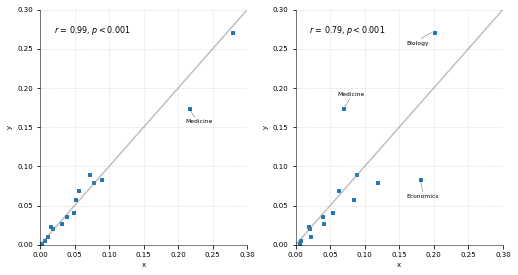

In [11]:
cm = 1/2.54  # centimeters in inches
fig = plt.figure(figsize=(18.3*cm, 18.3*cm))

ax = plt.subplot(2, 2, 1)
styleAx(ax)
plotFieldScatter(ax, big_table, 'Gender-identified', 'All', locs_b)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax = plt.subplot(2, 2, 2)
styleAx(ax)
plotFieldScatter(ax, big_table, 'MAG-matched', 'All', locs_a)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.tight_layout()
plt.savefig('../figures/representativeness_correlation.pdf', bbox_inches = 'tight', pad_inches = 0)

In [12]:
print(t1.assign(Percentage = lambda df: df.Percentage.apply(lambda x: x*100)).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrr}
\toprule
       Discipline &  Number of editors &  Percentage \\
\midrule
          Biology &               3949 &       20.05 \\
        Economics &               3537 &       17.96 \\
 Computer science &               2318 &       11.77 \\
          Physics &               1725 &        8.76 \\
      Mathematics &               1633 &        8.29 \\
         Medicine &               1357 &        6.89 \\
        Chemistry &               1216 &        6.17 \\
       Psychology &               1039 &        5.27 \\
Political science &                786 &        3.99 \\
      Engineering &                761 &        3.86 \\
         Business &                398 &        2.02 \\
Materials science &                392 &        1.99 \\
          Geology &                368 &        1.87 \\
       Philosophy &                122 &        0.62 \\
        Sociology &                 97 &        0.49 \\
\bottomrule
\end{tabular}



In [13]:
print(t2.assign(Percentage = lambda df: df.Percentage.apply(lambda x: x*100)).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrr}
\toprule
       Discipline &  Number of editors &  Percentage \\
\midrule
          Biology &              22474 &       27.82 \\
         Medicine &              17442 &       21.59 \\
        Economics &               7129 &        8.83 \\
 Computer science &               6190 &        7.66 \\
          Physics &               5783 &        7.16 \\
        Chemistry &               4409 &        5.46 \\
      Mathematics &               4040 &        5.00 \\
       Psychology &               3831 &        4.74 \\
      Engineering &               3024 &        3.74 \\
Political science &               2494 &        3.09 \\
Materials science &               1354 &        1.68 \\
          Geology &               1164 &        1.44 \\
         Business &                861 &        1.07 \\
       Philosophy &                433 &        0.54 \\
        Sociology &                148 &        0.18 \\
\bottomrule
\end{tabular}



In [14]:
print(t3.assign(Percentage = lambda df: df.Percentage.apply(lambda x: x*100)).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrr}
\toprule
       Discipline &  Number of editors &  Percentage \\
\midrule
          Biology &              27914 &       27.11 \\
         Medicine &              18005 &       17.49 \\
          Physics &               9348 &        9.08 \\
        Economics &               8649 &        8.40 \\
 Computer science &               8226 &        7.99 \\
        Chemistry &               7238 &        7.03 \\
      Mathematics &               5977 &        5.80 \\
       Psychology &               4248 &        4.13 \\
      Engineering &               3839 &        3.73 \\
Political science &               2875 &        2.79 \\
          Geology &               2464 &        2.39 \\
Materials science &               2240 &        2.18 \\
         Business &               1155 &        1.12 \\
       Philosophy &                614 &        0.60 \\
        Sociology &                172 &        0.17 \\
\bottomrule
\end{tabular}

